In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from cycler import cycler
from numpy import genfromtxt

import sys
sys.path.append("../")

%load_ext autoreload
%autoreload 2

In [35]:
def speedup(tseq, tpar_nw):
    return tseq/tpar_nw
def scalability(tpar_1, tpar_nw):
    return tpar_1/tpar_nw
def efficency(tseq, tpar_nw, nw):
    return tseq/(nw*tpar_nw)

def plot_speedup(tseq, tpar_nw, nw, labels, title, file):
    fig, ax = plt.subplots(figsize=(10,5))
    linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
    plt.rc('axes', prop_cycle=linestyle_cycler)
    # plot ideal
    plt.plot(np.linspace(0,32,2),np.linspace(0,32,2), label='Ideal', color='silver')
    
    for i in range(tseq.shape[0]):
        sp = speedup(tseq[i], tpar_nw[i,:])
        ax.plot(nw, sp, label = labels[i])

    ax.set_xticks(nw)
    plt.grid()
    plt.ylabel('SpeedUp(nw)')
    plt.xlabel('nw')
    plt.title(title)
    leg = ax.legend();
    plt.savefig(file, format='eps')
    plt.show()
    
def plot_scalability(tpar_1, tpar_nw, nw, labels, title, file):
    fig, ax = plt.subplots(figsize=(10,5))
    linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
    plt.rc('axes', prop_cycle=linestyle_cycler)
    # plot ideal
    plt.plot(np.linspace(0,32,2),np.linspace(0,32,2), label='Ideal', color='silver')
    
    for i in range(tpar_1.shape[0]):
        s = scalability(tpar_1[i], tpar_nw[i,:])
        ax.plot(nw, s, label = labels[i])

    ax.set_xticks(nw)
    plt.grid()
    plt.ylabel('Scalability(nw)')
    plt.xlabel('nw')
    plt.title(title)
    leg = ax.legend();
    plt.savefig(file, format='eps')
    plt.show()

def plot_efficency(tseq, tpar_nw, nw, labels, title, file):
    fig, ax = plt.subplots(figsize=(10,5))
    linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
    plt.rc('axes', prop_cycle=linestyle_cycler)
    # plot ideal
    plt.axhline(y=1, label='Ideal', color='silver')
    
    for i in range(tseq.shape[0]):
        e = efficency(tseq[i], tpar_nw[i,:], nw)
        ax.plot(nw, e, label = labels[i])

    ax.set_xticks(nw)
    plt.grid()
    plt.ylabel('SpeedUp(nw)')
    plt.xlabel('nw')
    plt.title(title)
    leg = ax.legend();
    plt.savefig(file, format='eps')
    plt.show()

In [3]:
!pwd

/Users/alessandro/Dev/repos/Jacobi-method/notebook


# Check vectorization

## verify sequatial case:

In [13]:
o3_seq_time_path = "../data/vectorization test/o3_seq_time.csv"
no_o3_seq_time_path = "../data/vectorization test/no_o3_seq_time.csv"

o3_seq_timeX = genfromtxt(o3_seq_time_path, delimiter=',')
no_o3_seq_timeX = genfromtxt(no_o3_seq_time_path, delimiter=',')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


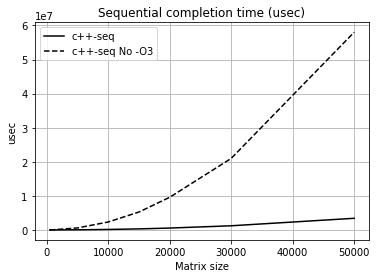

In [14]:
fig, ax = plt.subplots()

linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
plt.rc('axes', prop_cycle=linestyle_cycler)

matrix_size = o3_seq_timeX[1:,0].astype(int)
t = (o3_seq_timeX[1:,1])
ax.plot(matrix_size, t, label = "c++-seq")

matrix_size = no_o3_seq_timeX[1:,0].astype(int)
t = (no_o3_seq_timeX[1:,1])
ax.plot(matrix_size, t, label = "c++-seq No -O3")


plt.grid()
plt.ylabel('usec')
plt.xlabel('Matrix size')
plt.title("Sequential completion time (usec)")
leg = ax.legend();
plt.savefig('vect_seq_time.eps', format='eps')
plt.show()

## verify with 32 workers:

In [15]:
o3_th_time_path = "../data/vectorization test/o3_th_n_30k_time.csv"
no_o3_th_time_path = "../data/vectorization test/no_o3_th_n_30k_time.csv"

o3_th_timeX = genfromtxt(o3_th_time_path, delimiter=',')[1]
no_o3_th_timeX = genfromtxt(no_o3_th_time_path, delimiter=',')[1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


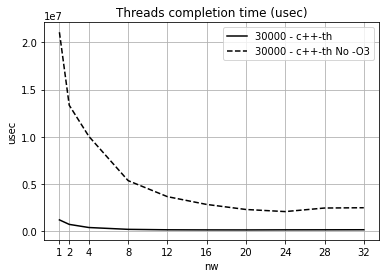

In [16]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()

linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
plt.rc('axes', prop_cycle=linestyle_cycler)

nw = [1,2,4, 8, 12, 16, 20, 24, 28, 32]
ax.plot(nw, o3_th_timeX[1:], label = "30000 - c++-th")
ax.plot(nw, no_o3_th_timeX[1:], label = "30000 - c++-th No -O3")

ax.set_xticks(nw)
plt.grid()
plt.ylabel('usec')
plt.xlabel('nw')
plt.title("Threads completion time (usec)")
leg = ax.legend();
plt.savefig('vect_th_time.eps', format='eps')
plt.show()

# SpeedUp, Scalability and Effecency analysis:

In [19]:
dataset_path = "../data/seq_th_ff_v2_all.csv"
df = pd.read_csv(dataset_path)
dataset= df.to_dict('list')

# to numpy
X = np.array([ dataset[feature] for feature in dataset.keys()]).T
print(X.shape)

# divide data and takes only rows where matrix size = [1000, 10000, 20000, 50000]
index = [0,2,4,6]
matrix_size = X[:,0][index]
seq_times = X[:,1][index]
th_times = X[:,2:34][index]
ff_times = X[:,34:66][index]
#nw = [1,2,4, 8, 12, 16, 20, 24, 28, 32]
nw = [1,2,3,4,5,6,7, 8,9,10,11, 12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

(7, 66)


In [5]:
for elem in seq_times:
    print(elem, end= " & ")

1194.9 & 134967.7 & 530612.38 & 3315428.5 & 

In [17]:
print(X[-1,:])
print(matrix_size[-1])
print(seq_times[-1])
print(th_times[-1,:])
print(ff_times[-1,:])

[  50000.   3320959.25 3395514.   1901192.38 1149850.5   965363.31
  874381.62  705902.81  634106.81  586408.    538302.81  484149.41
  457919.31  436454.5   408968.31  413485.91  389193.5   375142.41
  370656.69  371400.59  367252.31  363146.59  357790.19  359074.41
  373121.81  388906.19  396462.69  413848.    410289.19  420093.19
  414923.41  408585.5   410348.91  428201.59 3344314.5  1983585.25
 1499695.62 1129124.75  907847.5   739167.19  647774.81  576438.88
  519996.31  488652.41  450936.59  428678.69  408955.19  397070.41
  391864.5   378205.5   369787.31  368098.5   361205.69  358587.31
  351547.09  359899.69  351339.31  359653.    358685.59  372047.5
  386843.09  389186.81  400962.19  421258.41  428727.59  476689.69]
50000.0
3320959.25
[3395514.   1901192.38 1149850.5   965363.31  874381.62  705902.81
  634106.81  586408.    538302.81  484149.41  457919.31  436454.5
  408968.31  413485.91  389193.5   375142.41  370656.69  371400.59
  367252.31  363146.59  357790.19  359074.41

In [44]:
th_times[0,:]

array([ 1554. ,  1004.5,   659.8,  8621.7, 15576.4, 20566.7, 25424.4,
       30392. , 48387.1, 49743.6])

In [74]:
for i in range(matrix_size.shape[0]):
        print(matrix_size[i],end=" & ")
print("\\")
print("\hline")
for i in range(ff_times.T.shape[0]):
    print("&", end= " ")
    for j in range(th_times.T.shape[1]):
        print(ff_times.T[i,j],end=" & ")
    print("\\")

1000.0 & 10000.0 & 20000.0 & 50000.0 & \
\hline
& 1812.9 & 134452.2 & 531801.81 & 3309117.5 & \
& 2668.0 & 86836.8 & 318063.09 & 2015207.62 & \
& 4910.4 & 49663.9 & 180725.5 & 1133860.62 & \
& 9192.5 & 35300.6 & 101914.0 & 585130.69 & \
& 6171.0 & 34211.4 & 77570.1 & 433836.09 & \
& 11962.1 & 31955.8 & 75915.3 & 374158.09 & \
& 18769.1 & 36351.2 & 72697.8 & 353373.19 & \
& 52193.8 & 42009.0 & 75769.4 & 352107.0 & \
& 57802.8 & 39465.1 & 74503.9 & 402483.41 & \
& 101257.9 & 70126.8 & 97769.1 & 461804.5 & \


# SpeedUp(nw)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


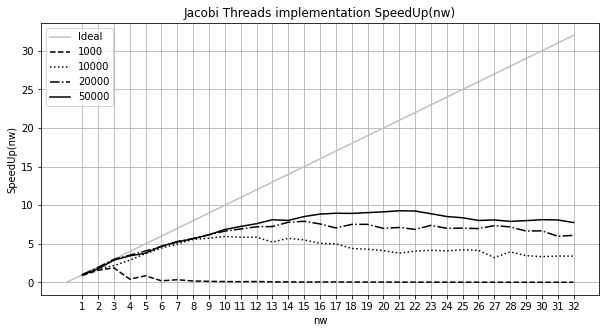

In [36]:
plot_speedup(seq_times,th_times,nw, matrix_size.astype(int), "Jacobi Threads implementation SpeedUp(nw)", "sp_th.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


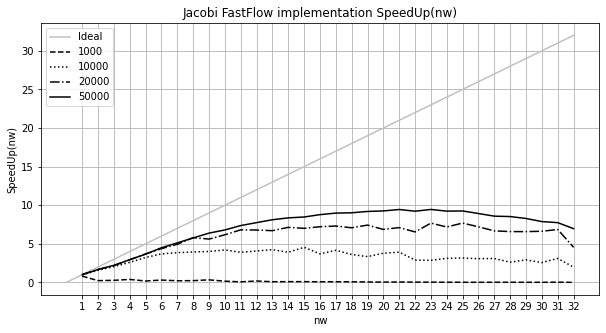

In [37]:
plot_speedup(seq_times, ff_times, nw, matrix_size.astype(int), "Jacobi FastFlow implementation SpeedUp(nw)", "sp_ff.eps")

# scalability

In [17]:
th_times[:,0]

array([1.5540000e+03, 1.3573400e+05, 5.3530138e+05, 3.3226910e+06])

In [18]:
seq_times

array([1.1949000e+03, 1.3496770e+05, 5.3061238e+05, 3.3154285e+06])

In [19]:
ff_times[:,0]

array([1.8129000e+03, 1.3445220e+05, 5.3180181e+05, 3.3091175e+06])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


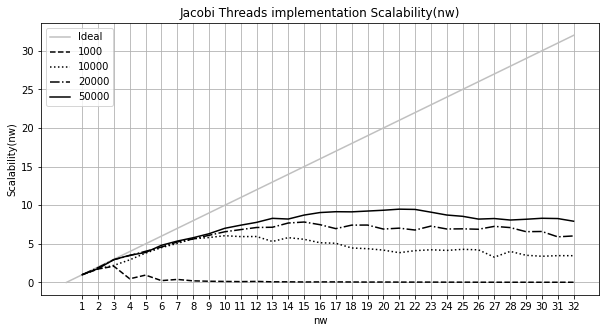

In [38]:
plot_scalability(th_times[:,0], th_times, nw, matrix_size.astype(int), "Jacobi Threads implementation Scalability(nw)", "scalab_th.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


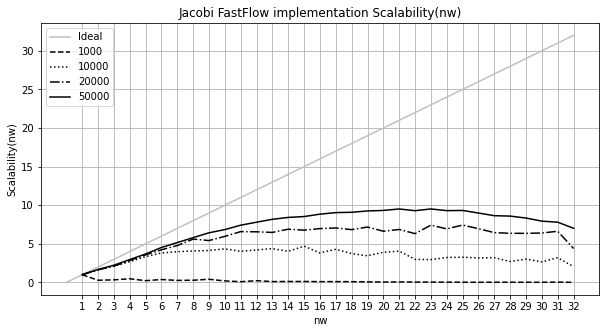

In [39]:
plot_scalability(ff_times[:,0], ff_times, nw, matrix_size.astype(int), "Jacobi FastFlow implementation Scalability(nw)", "scalab_ff.eps")

# efficency

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


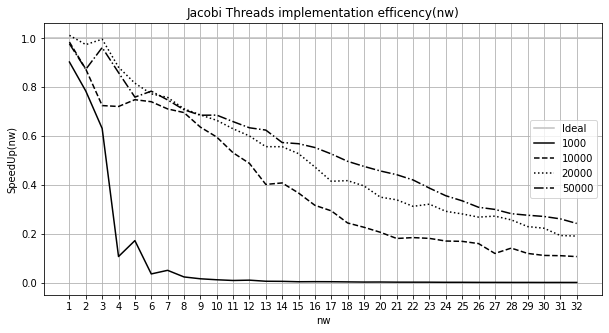

In [40]:
plot_efficency(seq_times, th_times, nw, matrix_size.astype(int), "Jacobi Threads implementation efficency(nw)", "E_th.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


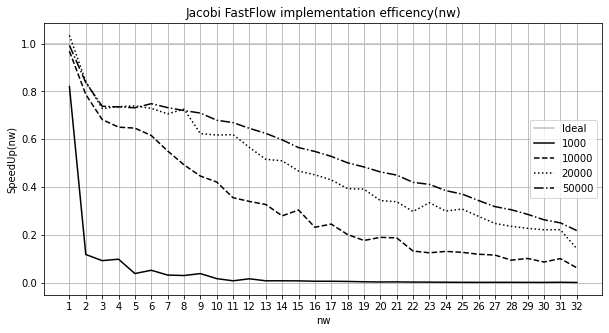

In [41]:
plot_efficency(seq_times, ff_times, nw, matrix_size.astype(int), "Jacobi FastFlow implementation efficency(nw)", "E_ff.eps")